# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.

Выполнил студент гр. 0382 Прибылов Никита. Вариант №20

## Цель работы
Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения и анализа сетей аффилированности.


## Основные теоретические положения

***Подграф***: Дан граф $Y(N, U)$. Подграфом $Y_s$ называется граф $Y_s = Y_s(N_s, U_s)$, состоящий из подмножества узлов $N_s \subseteq N$ и подмножества линий (ребер) $U_s \subseteq U$, связывающие узлы в $Y_s$

***Группа*** - совокупность всех акторов, связи между которыми должны быть изучены

***Подгруппа*** - подмножество узлов $N_s$

***Клика*** - максимальный полный подграф из трех или более узлов 

***n-клика*** - максимальный подграф, в котором наибольшее геодезическое расстояние между любыми двумя узлами не превышает $n$:
$d(i,j) \leq n, \forall n_i, n_j \in N_s$

***n-клан*** - это $n$-клика, в которой геодезическое расстояние $d(i,j)$ между всеми узлами в подграфе не превышает $n$ для путей внутри подграфа

***k-ядро*** - это максимальный подграф, в котором каждая вершина связана минимум с $k$ другими вершинами этого же подграфа

***k-плекс*** - это максимальный подграф, содержащий $g_s$ узлов, в котором каждый узел смежен не менее с чем с $(g_s - k)$ узлами подграфа:

$d_s(i) \geq g_s - k, \forall n \in N_s$, где $d_s(i)$ - степень узла $n_i$ в подграфе $Y_s$

***Максимальный подграф***: подграф является максимальным по отношению к свойству, заданному произвольно, если это свойство выполняется для этого подграфа, но перестанет выполняться, если к подграфу добавлен какой-либо узел или узлы

***Матрица инцедентности*** - матрица A = ${a_{ij}}$ размерности $g*h$ с элементами:
\begin{equation*}
a_{ij} = 
 \begin{cases}
   1, &\text{актор i связан с событием j}\\
   0, &\text{иначе}
 \end{cases}
\end{equation*}

***Двудольный граф (биграф)*** - граф, узлы которого можно разделить на 2 подмножества, а все ребра соединяют узлы, принадлежащие разным подмножествам.

Прдеставление биграфа в виде социоматрицы размера $(g+h)*(g+h)$

\begin{pmatrix}
  0_g& A\\
  A^T& 0_h
\end{pmatrix}

***Модулярность*** - характеристика структуры сети, в частности степень кластеризации узлов, когда внутри кластера наблюдается много узлов (высокая плотность), а между кластерми малов узлов (низкая плотность). Определяется как разница между долей связей внутри группы и ожидаемой долей связей, если бы связи были размещены случайно.

***Сеть аффилированности*** - сеть, в которой участники аффилированы друг с другом на основе сотрудничества в рамках какой-то группы или совместного участия в определенном событии. Сеть состоит из 2 измерений: множества акторов $N = \{n_1, n_2, ..., n_g\}$ и множества событий $M = \{m_1, m_2, ... , m_n\}$

***Матрица соучастия акторов***:

$X^N = \{x_{ij}^N\}$

$x_{ij}^N = \sum_{k=1}^ha_{ik}a_{jk}$

$X^N = AA^T$

***Матрица перекрытия событий***:

$X^M = \{x_{kl}^M\}$

$x_{kl}^M = \sum_{i=1}^ga_{ik}a_{il}$

$X^M = A^TA$

***Степень участия*** - количество событий, с которыми связан каждый актор:
$a_{i+} = \sum_{j=1}^ha_{ij} = x_{ii}^N$

***Среднее количество событий, с которым акторы аффилированы***:

$\overline{a_{i+}} = \frac{1}{g}\sum_{i=1}^g\sum_{j=1}^ha_{ij} = \frac{a_{++}}{g} = \frac{1}{g}\sum_{i=1}^gx_{ii}^N$

***Размер событий***:
$a_{+j} = \sum_{i=1}^ga_{ij} = x_{jj}^M$

***Средний размер событий*** - среднее количество акторов в каждом событии или средняя степень узлов, представляющих события в двудольном графе:
$\overline{a_{+j}} = \frac{1}{n}\sum_{i=1}^g\sum_{j=1}^ha_{ij} = \frac{a_{++}}{h} = \frac{1}{h}\sum_{j=1}^hx_{jj}^M$

***Плотность для отношения соучастя $Δ_{(N)}$***:
$Δ_{(N)} = \frac{1}{g(g-1)}\sum_{i=1}^g\sum_{j=1}^gx_{ij}^N, j \neq i$

***Плотность для отношения перекрытия $Δ_{(M)}$***:
$Δ_{(M)} = \frac{1}{h(h-1)}\sum_{k=1}^h\sum_{l=1}^hx_{kl}^M, l \neq k$

***Диаметр аффилированной сети*** - длина самого длинного пути между любой парой акторов и/или событий

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы


In [6]:
library(igraph)

1. Из файла _florentine_marital.csv_ была извлечена социоматрица. Полученная матрица была выведена на экран, соответствующая ей сеть отображена с помощью алгоритма Фрюхтермана–Рейнгольда.

In [185]:
fm_sociomatrix <- as.matrix(read.csv('florentine_marital.csv', comment.char = '#'))
rownames(fm_sociomatrix) <- colnames(fm_sociomatrix)
fm_sociomatrix

,Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
Acciaiuoli,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Albizzi,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
Barbadori,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
Bischeri,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
Castellani,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
Ginori,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guadagni,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
Lamberteschi,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Medici,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1
Pazzi,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [178]:
library(statnet)

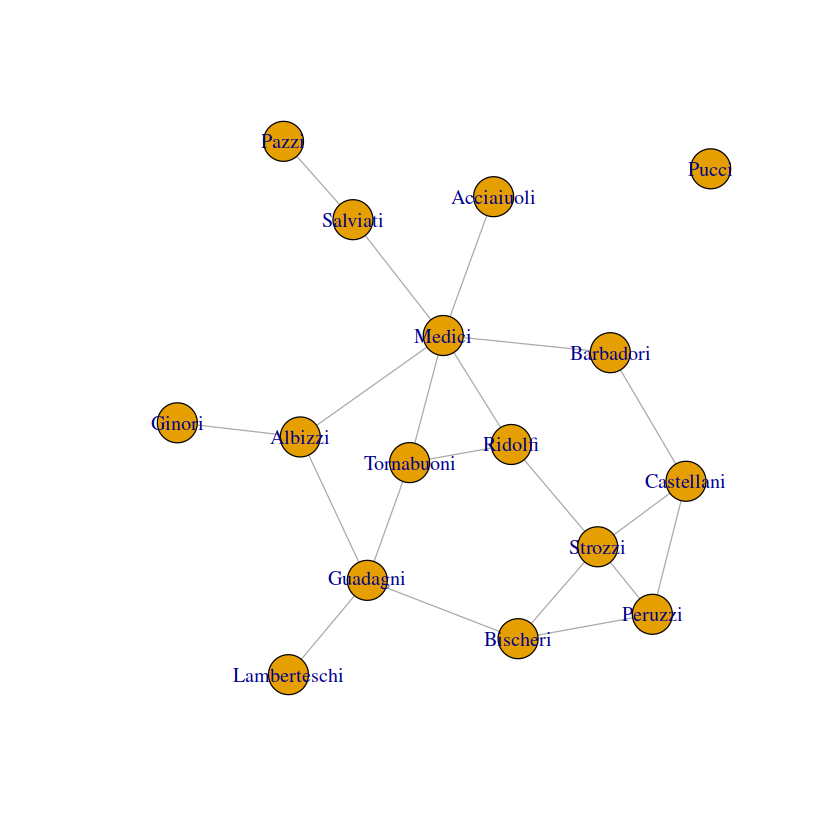

In [186]:
fm_graph <- graph.adjacency(fm_sociomatrix, mode = 'undirected')
fm_network <- network(fm_sociomatrix, directed = FALSE)
plot(fm_graph, layout=layout.fruchterman.reingold(fm_graph))

2. Сеть была исследована на предмет подгрупп с помощью n-клик и k-ядер.

In [264]:
ncliques <- function(graph, n) {
    return (max_cliques(connect(graph, order=n), min=3))
}

all_ncliques <- function(graph) {
    l <- list()
    for (i in 1:diameter(fm_graph)) {
        cliques <- list(ncliques(graph, i))
        names(cliques) <- i
        l <- append(l, cliques)
    }
    return (l)
}

fm_ncliques <- all_ncliques(fm_graph)
for (i in 1:length(fm_ncliques)) {
    cat(i, '-клики:\n\n', sep='')
    print(fm_ncliques[[i]])
    cat("\n\n\n")
}

Warning message in connect(graph, order = n):
“At core/operators/connect_neighborhood.c:77 : Order smaller than two, graph will be unchanged.”


1-клики:

[[1]]
+ 3/16 vertices, named, from 8bb08ba:
[1] Medici     Ridolfi    Tornabuoni

[[2]]
+ 3/16 vertices, named, from 8bb08ba:
[1] Peruzzi  Strozzi  Bischeri

[[3]]
+ 3/16 vertices, named, from 8bb08ba:
[1] Peruzzi    Strozzi    Castellani




2-клики:

[[1]]
+ 3/16 vertices, named, from 2de2a57:
[1] Pazzi    Medici   Salviati

[[2]]
+ 4/16 vertices, named, from 2de2a57:
[1] Ginori   Albizzi  Medici   Guadagni

[[3]]
+ 5/16 vertices, named, from 2de2a57:
[1] Lamberteschi Albizzi      Tornabuoni   Guadagni     Bischeri    

[[4]]
+ 5/16 vertices, named, from 2de2a57:
[1] Castellani Ridolfi    Strozzi    Medici     Barbadori 

[[5]]
+ 5/16 vertices, named, from 2de2a57:
[1] Castellani Ridolfi    Strozzi    Peruzzi    Barbadori 

[[6]]
+ 5/16 vertices, named, from 2de2a57:
[1] Castellani Ridolfi    Strozzi    Peruzzi    Bischeri  

[[7]]
+ 5/16 vertices, named, from 2de2a57:
[1] Guadagni Ridolfi  Peruzzi  Strozzi  Bischeri

[[8]]
+ 5/16 vertices, named, from 2de2a57:
[1] Guadagni

In [255]:
nclans <- function(graph, ncliques) {
    nclan <- list()
    for (i in 1:length(ncliques)) {
        nclan <- append(nclan, list())
        candidates <- ncliques[[i]]
        for (j in 1:length(candidates)) {
            subgraph <- subgraph(graph, candidates[[j]])
            if (diameter(subgraph) <= i) {
                nclan[[i]] <- append(nclan[[i]], candidates[[j]])
            }
        }
    }
    return (nclan)
}

nclans(fm_graph, fm_ncliques)


ERROR: Error in as.igraph.vs(graph, vids): Cannot use a vertex sequence from another graph.


In [265]:
kcores <- function(graph) {
    cores <- coreness(fm_graph)
    cores <- lapply(0:max(as.integer(cores)), function(x) names(cores)[which(as.integer(cores) >= x)])
    return (cores)
}
                    
fm_kcores <- kcores(fm_graph)
for (i in 1:length(fm_kcores)) {
    cat(i, '-ядро:\n', sep='')
    print(fm_kcores[[i]])
    cat('\n\n')
}

1-ядро:
 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Pazzi"       
[11] "Peruzzi"      "Pucci"        "Ridolfi"      "Salviati"     "Strozzi"     
[16] "Tornabuoni"  


2-ядро:
 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Pazzi"       
[11] "Peruzzi"      "Ridolfi"      "Salviati"     "Strozzi"      "Tornabuoni"  


3-ядро:
 [1] "Albizzi"    "Barbadori"  "Bischeri"   "Castellani" "Guadagni"  
 [6] "Medici"     "Peruzzi"    "Ridolfi"    "Strozzi"    "Tornabuoni"




3. С помощью библиотеки _igraph_ исследованы алгоритмы обнаружения сообществ: Spinglass, Walktrap, Label propagation.

Spinglass: основана на модели спинового стекла и имитации отжига.

Walktrap: пытается найти сообщества посредством случайных блужданий. Идея состоит в том, что короткие случайные блуждания, как правило, остаются в одном и том же сообществе.

Label propagation: быстрый алгоритм с почти линейным временем работы. Помечает вершины уникальными метками, а затем обновляет метки путем подсчета большинства голосов в окрестности вершины.

In [170]:
fm_sociomatrix_no_strays <- fm_sociomatrix[rowSums(fm_sociomatrix)!=0, colSums(fm_sociomatrix)!=0]
fm_graph_no_strays <- graph.adjacency(fm_sociomatrix_no_strays, mode = 'undirected')

print('Spinglass:')
fm_spinglass <- cluster_spinglass(fm_graph_no_strays)
cat('Модулярность:', modularity(fm_spinglass), '\n')
for (i in 1:length(fm_spinglass)) {
    print(fm_spinglass[i])
}

cat('\n\nWalktrap:')
fm_walktrap <- cluster_walktrap(fm_graph)
cat('\nМодулярность:', modularity(fm_walktrap), '\n')
for (i in 1:length(fm_walktrap)) {
    print(fm_walktrap[i])
}

cat('\n\nLabel propagation:')
fm_label_prop <- cluster_label_prop(fm_graph)
cat('\nМодулярность:', modularity(fm_label_prop), '\n')
for (i in 1:length(fm_label_prop)) {
    print(fm_label_prop[i])
}

[1] "Spinglass:"
Модулярность: 0.3975 
$`1`
[1] "Albizzi"      "Ginori"       "Guadagni"     "Lamberteschi"

$`2`
[1] "Bischeri"   "Castellani" "Peruzzi"    "Strozzi"   

$`3`
[1] "Acciaiuoli" "Barbadori"  "Medici"     "Ridolfi"    "Tornabuoni"

$`4`
[1] "Pazzi"    "Salviati"



Walktrap:
Модулярность: 0.3975 
$`1`
[1] "Albizzi"      "Ginori"       "Guadagni"     "Lamberteschi"

$`2`
[1] "Acciaiuoli" "Medici"     "Ridolfi"    "Tornabuoni"

$`3`
[1] "Barbadori"  "Bischeri"   "Castellani" "Peruzzi"    "Strozzi"   

$`4`
[1] "Pazzi"    "Salviati"

$`5`
[1] "Pucci"



Label propagation:
Модулярность: 0.3725 
$`1`
[1] "Acciaiuoli" "Barbadori"  "Medici"     "Ridolfi"    "Tornabuoni"

$`2`
[1] "Albizzi" "Ginori" 

$`3`
[1] "Bischeri"   "Castellani" "Peruzzi"    "Strozzi"   

$`4`
[1] "Guadagni"     "Lamberteschi"

$`5`
[1] "Pazzi"    "Salviati"

$`6`
[1] "Pucci"



4. Из файла _ceo.csv_ была извлечена матрица инцидентности и отображена на экране.

In [266]:
ceo_matrix <- as.matrix(read.csv('ceo.csv', comment.char = '#'))
print(as.matrix(ceo_matrix))
ceo_graph <- graph_from_incidence_matrix(ceo_matrix)

      X0 X0.1 X1 X1.1 X0.2 X0.3 X0.4 X0.5 X1.2 X0.6 X0.7 X0.8 X0.9 X0.10 X0.11
 [1,]  0    0  1    0    1    0    1    0    0    0    0    0    0     0     0
 [2,]  0    0  1    0    0    0    0    0    0    0    0    1    0     0     0
 [3,]  0    1  1    0    0    0    0    0    0    0    0    0    0     0     1
 [4,]  0    0  1    0    0    0    0    0    0    0    0    0    1     1     0
 [5,]  0    1  1    0    0    0    0    0    0    0    0    0    0     1     0
 [6,]  0    0  1    1    0    0    0    0    0    1    1    0    0     0     0
 [7,]  0    0  0    1    0    0    1    0    0    1    0    0    0     0     0
 [8,]  1    0  0    1    0    0    0    1    0    1    0    0    0     0     0
 [9,]  0    0  1    0    0    0    0    0    1    0    0    0    0     0     0
[10,]  0    1  1    0    0    0    0    0    1    0    0    0    0     0     0
[11,]  0    0  0    1    0    0    1    0    0    0    0    0    0     0     0
[12,]  0    0  1    1    1    0    0    0    1    0 

5. Сеть была отображена в виде биграфа.

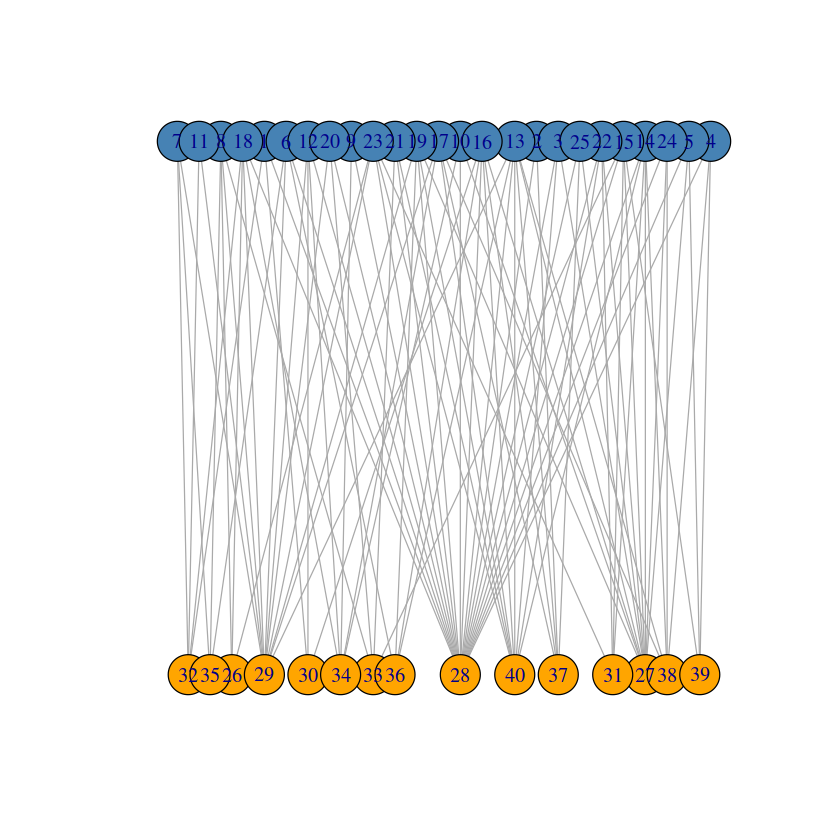

In [207]:
col <- c("steelblue", "orange")
plot(ceo_graph,
    layout=layout_as_bipartite(ceo_graph),
    vertex.color = col[as.numeric(V(ceo_graph)$type)+1]
)

7. Сеть аффилированности была представлена в виде двух одномодальных сетей: сеть соучастия и сеть перекрытия событий. Полученные сети представлены в виде ценностных матриц и взвешенных графов.

Матрица соучастия:

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    3    1    1    1    1    1    1    0    1     1     1     2     1
 [2,]    1    2    1    1    1    1    0    0    1     1     0     1     2
 [3,]    1    1    3    1    2    1    0    0    1     2     0     1     3
 [4,]    1    1    1    3    2    1    0    0    1     1     0     1     2
 [5,]    1    1    2    2    3    1    0    0    1     2     0     1     2
 [6,]    1    1    1    1    1    4    2    2    1     1     1     2     3
 [7,]    1    0    0    0    0    2    3    2    0     0     2     1     1
 [8,]    0    0    0    0    0    2    2    4    0     0     1     1     1
 [9,]    1    1    1    1    1    1    0    0    2     2     0     2     1
[10,]    1    1    2    1    2    1    0    0    2     3     0     2     2
[11,]    1    0    0    0    0    1    2    1    0     0     2     1     1
[12,]    2    1    1    1    1    2    1    1    2     2     1     4     2
[13,]

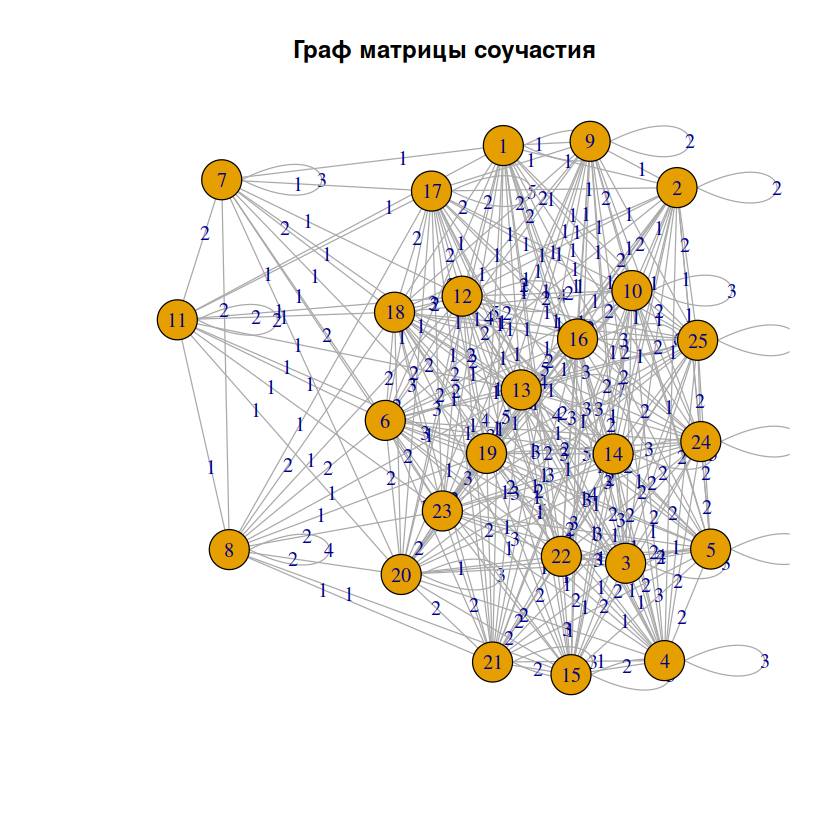

In [221]:
cat('Матрица соучастия:\n\n')
ceo_actor_comembership_matrix <- ceo_matrix %*% t(ceo_matrix)
print(ceo_actor_comembership_matrix)

ceo_actor_comembership_graph <- graph.adjacency(ceo_actor_comembership_matrix, weighted = TRUE, mode = "undirected")
plot(ceo_actor_comembership_graph, edge.label = E(ceo_actor_comembership_graph)$weight, main='Граф матрицы соучастия')

Матрица перекрытия событий:

      X0 X0.1 X1 X1.1 X0.2 X0.3 X0.4 X0.5 X1.2 X0.6 X0.7 X0.8 X0.9 X0.10 X0.11
X0     3    0  2    3    0    1    1    1    1    1    0    0    0     0     1
X0.1   0   11 11    2    1    3    0    1    1    0    3    3    3     2     6
X1     2   11 21    7    3    4    2    3    4    1    4    4    4     3     8
X1.1   3    2  7   11    1    1    3    2    3    3    3    2    2     0     4
X0.2   0    1  3    1    3    0    1    0    1    0    1    1    0     0     1
X0.3   1    3  4    1    0    4    0    1    0    0    0    0    1     1     3
X0.4   1    0  2    3    1    0    4    0    1    1    0    0    0     0     0
X0.5   1    1  3    2    0    1    0    4    0    1    0    0    0     1     1
X1.2   1    1  4    3    1    0    1    0    5    0    0    1    1     0     1
X0.6   1    0  1    3    0    0    1    1    0    3    1    0    0     0     0
X0.7   0    3  4    3    1    0    0    0    0    1    4    2    1     0     3
X0.8   0    3  4    2  

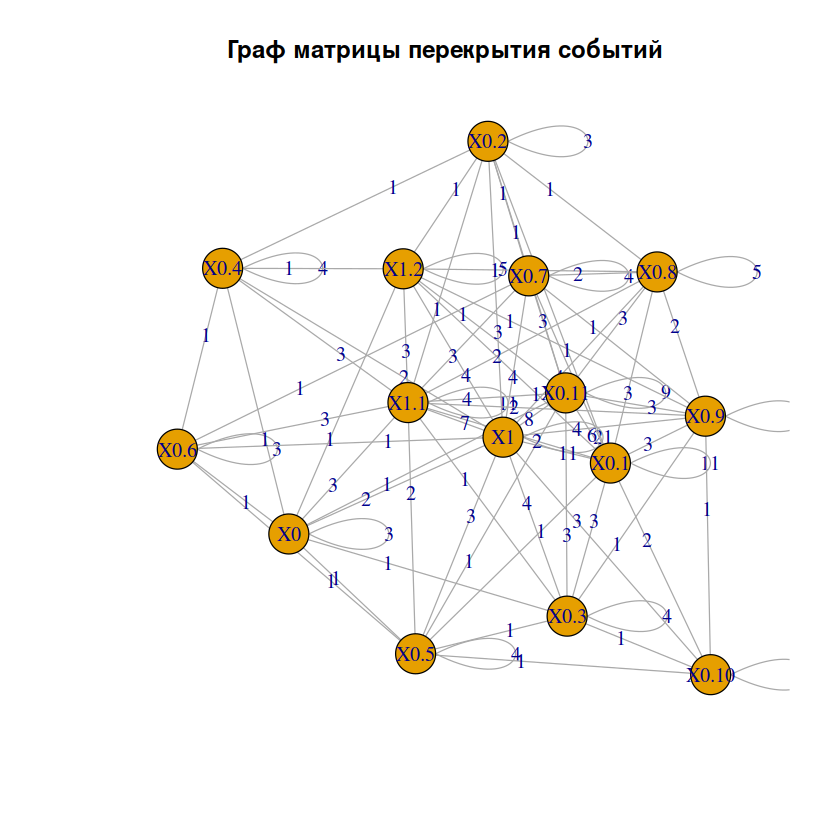

In [226]:
cat('Матрица перекрытия событий:\n\n')
ceo_event_overlap_matrix <- t(ceo_matrix) %*% ceo_matrix
print(ceo_event_overlap_matrix)

ceo_event_overlap_graph <- graph.adjacency(ceo_event_overlap_matrix, weighted = TRUE, mode = "undirected")
plot(ceo_event_overlap_graph, edge.label = E(ceo_event_overlap_graph)$weight, main='Граф матрицы перекрытия событий')

8. Были вычислены степени участия для каждого актора, а также среднее количество событий, с которыми актор аффилирован.

In [242]:
ceo_rates_of_participation = diag(ceo_actor_comembership_matrix)
names(ceo_rates_of_participation) <- c(paste('актор', 1:length(ceo_rates_of_participation)))
cat('Степени соучастия:\n\n')
print(ceo_rates_of_participation)
cat('\nСредняя степень соучастия:', mean(ceo_rates_of_participation))

Степени соучастия:

 актор 1  актор 2  актор 3  актор 4  актор 5  актор 6  актор 7  актор 8 
       3        2        3        3        3        4        3        4 
 актор 9 актор 10 актор 11 актор 12 актор 13 актор 14 актор 15 актор 16 
       2        3        2        4        7        5        5        6 
актор 17 актор 18 актор 19 актор 20 актор 21 актор 22 актор 23 актор 24 
       5        5        5        3        3        4        5        3 
актор 25 
       3 

Средняя степень соучастия: 3.8

Каждый актор в среднем связан с ~4 событиями.

9. Были вычислены размеры каждого события и средний размер событий.

In [243]:
ceo_size_of_events = diag(ceo_event_overlap_matrix)
names(ceo_size_of_events) <- c(paste('событие', 1:length(ceo_size_of_events)))
cat('Размеры событий:\n\n')
print(ceo_size_of_events)
cat('\nСредний размер событий:', mean(ceo_size_of_events))

Размеры событий:

 событие 1  событие 2  событие 3  событие 4  событие 5  событие 6  событие 7 
         3         11         21         11          3          4          4 
 событие 8  событие 9 событие 10 событие 11 событие 12 событие 13 событие 14 
         4          5          3          4          5          5          3 
событие 15 
         9 

Средний размер событий: 6.333333

Каждое событие в среднем связано с ~6 событиями.

10. Были вычислены плотности для соотношения соучастия и отношения перекрытия.

In [247]:
g <- nrow(ceo_actor_comembership_matrix)
h <- nrow(ceo_event_overlap_matrix)
ceo_comembership_density = (sum(ceo_actor_comembership_matrix) - sum(ceo_rates_of_participation)) / (g*(g-1))
ceo_overlap_density = (sum(ceo_event_overlap_matrix) - sum(ceo_size_of_events)) / (h*(h-1))
cat('Плотность отношения соучастия:', ceo_comembership_density)
cat('\nПлотность отношения перекрытия:', ceo_overlap_density)

Плотность отношения соучастия: 1.406667
Плотность отношения перекрытия: 1.457143

Полученные плотности довольно малы.

11. Был определен диаметр сети аффилированности.

In [252]:
cat('Диаметр сети аффилированности: ', 
    max(diameter(ceo_actor_comembership_graph), diameter(ceo_event_overlap_graph)))

Диаметр сети аффилированности:  4

## Выводы

Общий вывод по проделанной работе.

С помощью математических пакетов были исследованы социальная сеть на предмет подгрупп и сеть аффилированности CEO.